# Applications: Model

## Data exploration

## Setup

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", color_codes=True)

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
my_colors = [blue, orange]

## Import data

In [4]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "duke-forest.csv"

df = pd.read_csv(ROOT + DATA)
df.head()

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
0,"1 Learned Pl, Durham, NC 27705",1520000,3,4.0,6040,Single Family,1972,"Other, Gas",central,0 spaces,0.97,NaN,https://www.zillow.com/homedetails/1-Learned-P...
1,"1616 Pinecrest Rd, Durham, NC 27705",1030000,5,4.0,4475,Single Family,1969,"Forced air, Gas",central,"Carport, Covered",1.38,NaN,https://www.zillow.com/homedetails/1616-Pinecr...
2,"2418 Wrightwood Ave, Durham, NC 27705",420000,2,3.0,1745,Single Family,1959,"Forced air, Gas",central,"Garage - Attached, Covered",0.51,NaN,https://www.zillow.com/homedetails/2418-Wright...
3,"2527 Sevier St, Durham, NC 27705",680000,4,3.0,2091,Single Family,1961,"Heat pump, Other, Electric, Gas",central,"Carport, Covered",0.84,NaN,https://www.zillow.com/homedetails/2527-Sevier...
4,"2218 Myers St, Durham, NC 27707",428500,4,3.0,1772,Single Family,2020,"Forced air, Gas",central,0 spaces,0.16,NaN,https://www.zillow.com/homedetails/2218-Myers-...


In [5]:
df.tail()

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
93,"2507 Sevier St, Durham, NC 27705",541000,4,4.0,2740,Single Family,1960,"Forced air, Heat pump, Gas",central,"Carport, Covered",0.51,NaN,https://www.zillow.com/homedetails/2507-Sevier...
94,"1207 Woodburn Rd, Durham, NC 27705",473000,3,3.0,2171,Single Family,1955,"Forced air, Electric, Gas",other,0 spaces,0.61,NaN,https://www.zillow.com/homedetails/1207-Woodbu...
95,"3008 Montgomery St, Durham, NC 27705",490000,4,4.0,2972,Single Family,1984,"Forced air, Electric, Gas",central,"Garage - Attached, Off-street, Covered",0.65,NaN,https://www.zillow.com/homedetails/3008-Montgo...
96,"1614 Pinecrest Rd, Durham, NC 27705",815000,4,4.0,3904,Single Family,1970,"Forced air, Gas",other,"Garage - Attached, Garage - Detached, Covered",1.47,NaN,https://www.zillow.com/homedetails/1614-Pinecr...
97,"2708 Circle Dr, Durham, NC 27705",674500,4,4.0,3766,Single Family,1955,"Forced air, Electric, Gas",other,0 spaces,0.73,NaN,https://www.zillow.com/homedetails/2708-Circle...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     98 non-null     object 
 1   price       98 non-null     int64  
 2   bed         98 non-null     int64  
 3   bath        98 non-null     float64
 4   area        98 non-null     int64  
 5   type        98 non-null     object 
 6   year_built  98 non-null     int64  
 7   heating     98 non-null     object 
 8   cooling     98 non-null     object 
 9   parking     98 non-null     object 
 10  lot         97 non-null     float64
 11  hoa         1 non-null      object 
 12  url         98 non-null     object 
dtypes: float64(2), int64(4), object(7)
memory usage: 10.1+ KB


In [7]:
# Drop irrelevant features
df = df.drop(['url', 'address'], axis=1)

In [8]:
# Convert data types
df['type'] = df['type'].astype("category")
df['heating'] = df['heating'].astype("category")
df['cooling'] = df['cooling'].astype("category")
df['parking'] = df['parking'].astype("category")

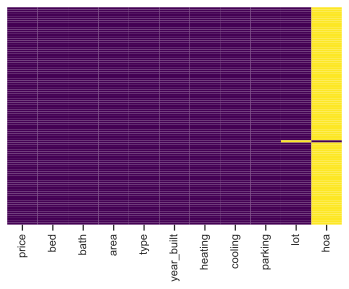

In [9]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [10]:
print(df.isnull().sum())

price          0
bed            0
bath           0
area           0
type           0
year_built     0
heating        0
cooling        0
parking        0
lot            1
hoa           97
dtype: int64


In [11]:
# drop column with too many missing values
df = df.drop(['hoa'], axis=1)
# drop remaining row with missing value
df = df.dropna()

In [12]:
print(df.isnull().sum())

price         0
bed           0
bath          0
area          0
type          0
year_built    0
heating       0
cooling       0
parking       0
lot           0
dtype: int64


In [13]:
# summary statistics for all categorical columns
df.describe(include=['category']).transpose()

,count,unique,top,freq
type,97,1,Single Family,97
heating,97,19,"Forced air, Gas",34
cooling,97,2,other,52
parking,97,19,0 spaces,42


Variable `type` has zero veriation (only single family) and therefore can be exluded from the analysis and the model. We will also exclude `heating`and `parking` to keep this example as simple as possible.

In [14]:
df = df.drop(['type', 'heating', 'parking'], axis=1)
df

,price,bed,bath,area,year_built,cooling,lot
0,1520000,3,4.0,6040,1972,central,0.97
1,1030000,5,4.0,4475,1969,central,1.38
2,420000,2,3.0,1745,1959,central,0.51
3,680000,4,3.0,2091,1961,central,0.84
4,428500,4,3.0,1772,2020,central,0.16
...,...,...,...,...,...,...,...
93,541000,4,4.0,2740,1960,central,0.51
94,473000,3,3.0,2171,1955,other,0.61
95,490000,4,4.0,2972,1984,central,0.65
96,815000,4,4.0,3904,1970,other,1.47


## Data splitting

In [15]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_dataset

,price,bed,bath,area,year_built,cooling,lot
26,385000,3,2.0,1831,1951,central,0.29
85,485000,4,3.0,2609,1962,other,0.52
2,420000,2,3.0,1745,1959,central,0.51
55,150000,3,1.0,1734,1945,other,0.16
69,105000,2,1.0,1094,1940,other,0.26
...,...,...,...,...,...,...,...
96,815000,4,4.0,3904,1970,other,1.47
70,520000,4,3.0,2637,1968,other,0.65
20,270000,3,3.0,1416,1990,other,0.36
92,590000,5,3.0,3323,1980,other,0.43


## Exploratory data analysis

In [16]:
# summary statistics for all numerical columns
round(train_dataset.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
price,78.0,560762.18,243254.08,95000.00,421250.00,537500.00,650000.00,1520000.00
bed,78.0,3.81,0.74,2.00,3.00,4.00,4.00,6.00
bath,78.0,3.10,0.92,1.00,2.50,3.00,4.00,5.00
area,78.0,2831.40,986.38,1094.00,2095.25,2745.00,3261.75,6178.00
year_built,78.0,1965.82,16.80,1923.00,1956.25,1961.50,1971.50,2020.00
lot,78.0,0.59,0.23,0.15,0.45,0.56,0.69,1.47


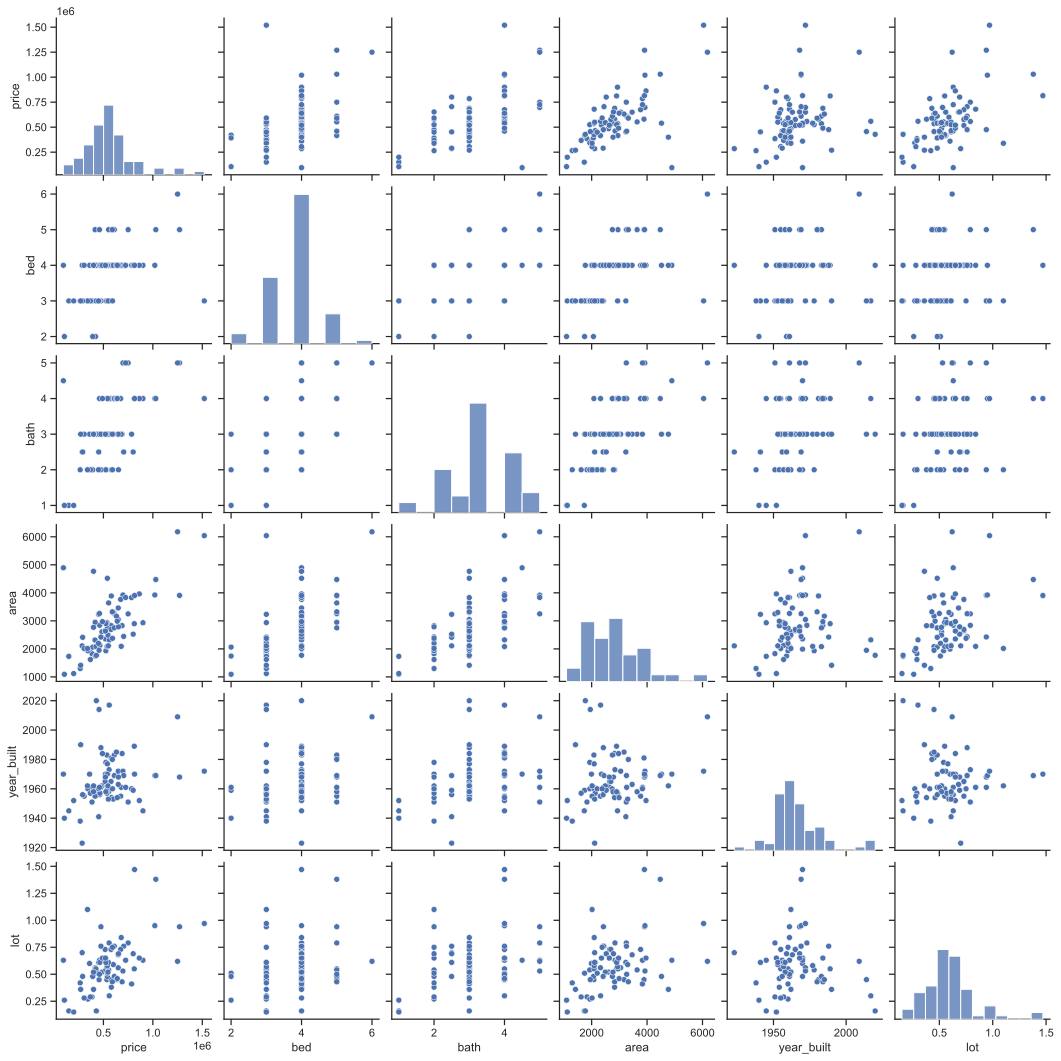

In [17]:
sns.pairplot(train_dataset);

## Correlation analysis

In [18]:
# Create correlation matrix for numerical variables
corr_matrix = train_dataset.corr()
corr_matrix

,price,bed,bath,area,year_built,lot
price,1.000000,0.446668,0.593686,0.680012,0.248102,0.537264
bed,0.446668,1.000000,0.599660,0.560258,0.216696,0.248166
bath,0.593686,0.599660,1.000000,0.659879,0.351917,0.335490
area,0.680012,0.560258,0.659879,1.000000,0.165495,0.412836
year_built,0.248102,0.216696,0.351917,0.165495,1.000000,-0.047352
lot,0.537264,0.248166,0.335490,0.412836,-0.047352,1.000000


<ipython-input-19-e81039e5ed17>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


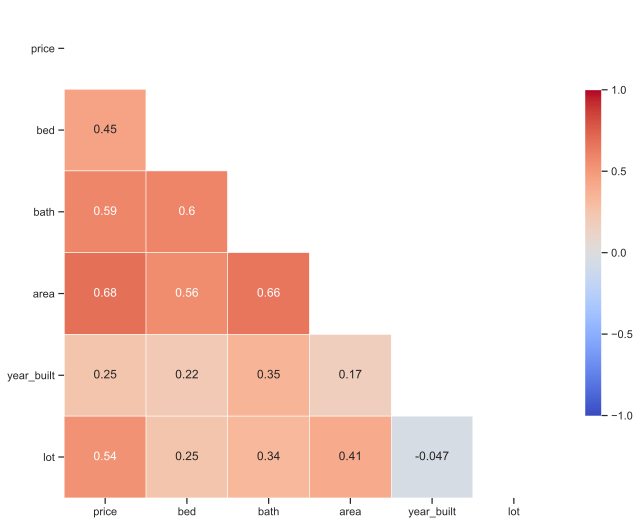

In [19]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15))


heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True});

## Modeling

See separate notebooks.